In [99]:
import os
import geopandas
import pandas
import zipfile
import numpy as np
import matplotlib.pyplot as plot

In [2]:
if not os.path.exists('LANDSAT_OT_C2_L1.csv.gz'):
    !wget "https://landsat.usgs.gov/landsat/metadata_service/bulk_metadata_files/LANDSAT_OT_C2_L1.gz"
ot_c2 = pandas.read_csv('LANDSAT_OT_C2_L1.csv.gz')

In [3]:
if not os.path.exists('LANDSAT_ETM_C2_L1.csv.gz'):
    !wget "https://landsat.usgs.gov/landsat/metadata_service/bulk_metadata_files/LANDSAT_ETM_C2_L1.csv.gz"
etm_c2 = pandas.read_csv('LANDSAT_ETM_C2_L1.csv.gz')

/home/simonaoliver/anaconda3/envs/satellite_footprint/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
if not os.path.exists('LANDSAT_TM_C2_L1.csv.gz'):
    !wget "https://landsat.usgs.gov/landsat/metadata_service/bulk_metadata_files/LANDSAT_TM_C2_L1.csv.gz"
tm_c2 = pandas.read_csv('LANDSAT_TM_C2_L1.csv.gz') 


/home/simonaoliver/anaconda3/envs/satellite_footprint/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
if not os.path.exists('WRS2_descending_0.zip'):
    !wget "https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/atoms/files/WRS2_descending_0.zip"
wrs2desc = geopandas.GeoDataFrame.from_file('WRS2_descending_0.zip') 

In [6]:
if not os.path.exists('WRS2_ascending_0.zip'):
    !wget "https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/atoms/files/WRS2_ascending_0.zip"
wrs2asc = geopandas.GeoDataFrame.from_file('WRS2_ascending_0.zip')

In [58]:
ot_c2['PR'] = ot_c2['WRS Path'].map(str).str.pad(3,fillchar='0') + ot_c2['WRS Row'].map(str).str.pad(3,fillchar='0')

etm_c2['PR'] = etm_c2['WRS Path'].map(str).str.pad(3,fillchar='0') + etm_c2['WRS Row'].map(str).str.pad(3,fillchar='0')

tm_c2['PR'] = tm_c2['WRS Path'].map(str).str.pad(3,fillchar='0') + tm_c2['WRS Row'].map(str).str.pad(3,fillchar='0')

In [132]:
antarctica = geopandas.GeoDataFrame.from_file('zip://TM_WORLD_BORDERS_SIMPL-0.3.zip')

In [180]:
if not os.path.exists('TM_WORLD_BORDERS_SIMPL-0.3.zip'):
    !wget 'http://thematicmapping.org/downloads/TM_WORLD_BORDERS_SIMPL-0.3.zip'

antarctica = geopandas.GeoDataFrame.from_file('zip://TM_WORLD_BORDERS_SIMPL-0.3.zip')
antarctica = antarctica[antarctica.NAME.isin(['Heard Island and McDonald Islands', 'Antarctica'])]

In [154]:
wrs2desc.set_index('PR', inplace = True)

wrs2desc_intersect = wrs2desc.intersection(antarctica)

/home/simonaoliver/anaconda3/envs/satellite_footprint/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [155]:
antarctica.reset_index(inplace = True)

wrs2desc.reset_index(inplace = True)

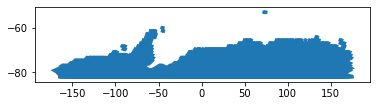

In [156]:
antarctica_wrs2desc = geopandas.sjoin(wrs2desc, antarctica)

antarctica_wrs2desc.plot()

antarctica_wrs2desc['PR'] = antarctica_wrs2desc['PATH'].map(str).str.pad(3,fillchar='0') + antarctica_wrs2desc['ROW'].map(str).str.pad(3,fillchar='0')

antarctica_wrs2desc.set_index('PR', inplace = True)

In [157]:
ot_c2['count'] = 1

In [158]:
ot_c2_pivot = ot_c2.pivot_table(index='PR', aggfunc={"count": np.sum})

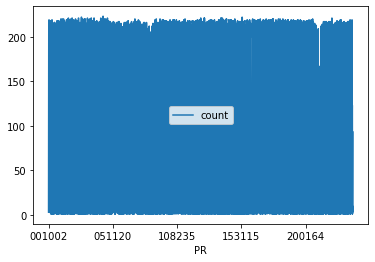

In [159]:
ot_c2_pivot.plot()

In [160]:
etm_c2['count'] = 1

In [161]:
etm_c2_pivot = etm_c2.pivot_table(index='PR', aggfunc={"count": np.sum})

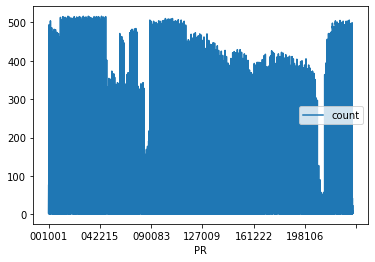

In [162]:
etm_c2_pivot.plot()

In [163]:
tm_c2['count'] = 1

In [164]:
tm_c2_pivot = tm_c2.pivot_table(index='PR', aggfunc={"count": np.sum})

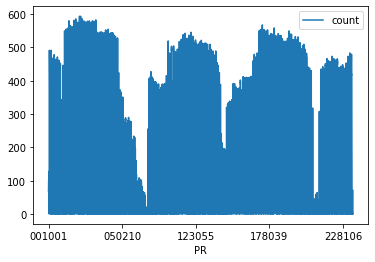

In [165]:
tm_c2_pivot.plot()

In [166]:
ot_c2_antarctica_wrs2desc = antarctica_wrs2desc.join(ot_c2_pivot, on ='PR')

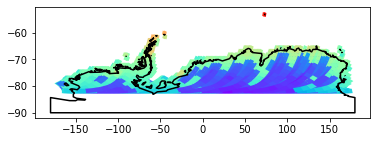

In [167]:
ax = ot_c2_antarctica_wrs2desc.plot("count", cmap='rainbow')
antarctica.boundary.plot(ax=ax,  edgecolor='black')

In [168]:
etm_c2_antarctica_wrs2desc = antarctica_wrs2desc.join(etm_c2_pivot, on ='PR')

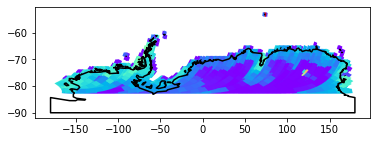

In [169]:
ax = etm_c2_antarctica_wrs2desc.plot("count", cmap='rainbow')
antarctica.boundary.plot(ax=ax,  edgecolor='black')

In [170]:
tm_c2_antarctica_wrs2desc = antarctica_wrs2desc.join(tm_c2_pivot, on ='PR')

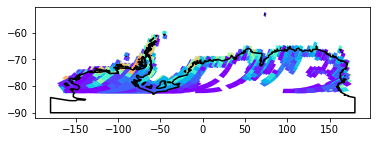

In [171]:
ax = tm_c2_antarctica_wrs2desc.plot("count", cmap='rainbow')
antarctica.boundary.plot(ax=ax,  edgecolor='black')

### Total image counts for descending

In [175]:
ot_c2_antarctica_wrs2desc['count'].sum().astype(int)

209569

In [176]:
etm_c2_antarctica_wrs2desc['count'].sum().astype(int)

71920

In [174]:
tm_c2_antarctica_wrs2desc['count'].sum().astype(int)

8002

In [173]:
tm_c2[tm_c2['Product Map Projection L1'] == 'PS']

,Browse Link,Display ID,Ordering ID,Landsat Product Identifier L1,Landsat Scene Identifier,Date Acquired,Collection Category,Collection Number,Sensor Mode,WRS Path,...,Corner Upper Left Latitude,Corner Upper Left Longitude,Corner Upper Right Latitude,Corner Upper Right Longitude,Corner Lower Left Latitude,Corner Lower Left Longitude,Corner Lower Right Latitude,Corner Lower Right Longitude,PR,count
19,https://landsatlook.usgs.gov/gen-browse?size=r...,LT04_L1GS_165109_19880215_20200917_02_T2,LT41651091988046XXX05,LT04_L1GS_165109_19880215_20200917_02_T2,LT41651091988046XXX05,1988/02/15,T2,2,NaN,165,...,-68.50519,13.14155,-69.15802,17.36128,-69.94027,11.05414,-70.63901,15.51105,165109,1
20,https://landsatlook.usgs.gov/gen-browse?size=r...,LT04_L1GS_165110_19880215_20200917_02_T2,LT41651101988046XXX03,LT04_L1GS_165110_19880215_20200917_02_T2,LT41651101988046XXX03,1988/02/15,T2,2,NaN,165,...,-69.79350,11.26500,-70.48726,15.69683,-71.20579,8.92024,-71.95138,13.60530,165110,1
23,https://landsatlook.usgs.gov/gen-browse?size=r...,LT04_L1GS_213108_19880215_20200917_02_T2,LT42131081988046XXX01,LT04_L1GS_213108_19880215_20200917_02_T2,LT42131081988046XXX01,1988/02/15,T2,2,NaN,213,...,-67.18521,-59.32597,-67.80122,-55.30533,-68.63943,-61.19443,-69.29623,-56.95370,213108,1
24,https://landsatlook.usgs.gov/gen-browse?size=r...,LT04_L1GS_213109_19880215_20200917_02_T2,LT42131091988046XXX02,LT04_L1GS_213109_19880215_20200917_02_T2,LT42131091988046XXX02,1988/02/15,T2,2,NaN,213,...,-68.50649,-61.02798,-69.15936,-56.80806,-69.94155,-63.11563,-70.64034,-58.65850,213109,1
25,https://landsatlook.usgs.gov/gen-browse?size=r...,LT04_L1GS_213110_19880215_20200917_02_T2,LT42131101988046XXX02,LT04_L1GS_213110_19880215_20200917_02_T2,LT42131101988046XXX02,1988/02/15,T2,2,NaN,213,...,-69.79478,-62.90515,-70.48858,-58.47310,-71.20705,-65.25019,-71.95268,-60.56490,213110,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573067,https://landsatlook.usgs.gov/gen-browse?size=r...,LT05_L1GS_072107_20040902_20200903_02_T2,LT50721072004246HOA00,LT05_L1GS_072107_20040902_20200903_02_T2,LT50721072004246HOA00,2004/09/02,T2,2,BUMPER,72,...,-65.86686,160.09410,-66.45041,163.93305,-67.33694,158.40875,-67.95691,162.45112,072107,1
2579336,https://landsatlook.usgs.gov/gen-browse?size=r...,LT05_L1GS_072107_20040614_20200903_02_T2,LT50721072004166HOA00,LT05_L1GS_072107_20040614_20200903_02_T2,LT50721072004166HOA00,2004/06/14,T2,2,BUMPER,72,...,-65.86701,160.06977,-66.45056,163.90874,-67.33708,158.38440,-67.95706,162.42679,072107,1
2584836,https://landsatlook.usgs.gov/gen-browse?size=r...,LT05_L1GS_072107_20040529_20200903_02_T2,LT50721072004150HOA00,LT05_L1GS_072107_20040529_20200903_02_T2,LT50721072004150HOA00,2004/05/29,T2,2,BUMPER,72,...,-65.86495,160.07721,-66.44846,163.91591,-67.33505,158.39211,-67.95498,162.43420,072107,1
2595465,https://landsatlook.usgs.gov/gen-browse?size=r...,LT05_L1GS_072107_20040427_20200903_02_T2,LT50721072004118HOA00,LT05_L1GS_072107_20040427_20200903_02_T2,LT50721072004118HOA00,2004/04/27,T2,2,BUMPER,72,...,-65.86778,160.08036,-66.45135,163.91943,-67.33785,158.39489,-67.95785,162.43739,072107,1
